## **Notebook 10: Simple Application of PCA and K-Means Clustering**
### CBE 512. Machine Learning in Chemical Science and Engineering.

&#169; Princeton University


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
# Read in and inspect some of the data to gain some familiarity for what is in
# the file. The rest of the code extracts some possible features and stores them
# in an array X; the labels, which correspond to solubility values, are in y
url_for_data    = "https://raw.githubusercontent.com/webbtheosim/CBE512-MLinChmSciEng/main/data/solubility-regression-cbe512.csv"
data = pd.read_csv(
    url_for_data
)
i0          = list(data.columns).index("MolWt")
allFeatures = data.columns[i0:-1]
outLabel    = 'Solubility'
X = np.array(data[allFeatures])
nFeatures = X.shape[1]
y = np.array(data[outLabel]).reshape([-1,1])

# scale the data
inScaler = StandardScaler() # scaler for features
inScaler.fit(X)
Xsc = inScaler.transform(X)

outScaler = StandardScaler() # scaler for features
outScaler.fit(y)
ysc = outScaler.transform(y)

print(Xsc.shape,y.shape)
data.head()

(9982, 17) (9982, 1)


,ID,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Solubility
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23,0,...,142,0,0,0,0,0.00,158.520601,0.000000e+00,210.377334,-3.616127
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,169.183,2.4055,51.9012,13,1,...,62,2,0,1,3,29.10,75.183563,2.582996e+00,511.229248,-3.254767
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,140.569,2.1525,36.8395,9,1,...,46,1,0,0,1,17.07,58.261134,3.009782e+00,202.661065,-2.177078
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,756.226,8.1161,200.7106,53,6,...,264,6,0,0,6,120.72,323.755434,2.320000e-07,1964.648666,-3.924409
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,422.525,2.4854,119.0760,31,6,...,164,2,4,4,6,56.60,183.183268,1.084427e+00,769.899934,-4.662065


### Principal Component Analysis for Visualization and Dimensionality Reduction

High-dimensional datasets can be challenging to analyze and visualize directly, as visual patterns and relationships between features may be obscured by noise or complexity. **Principal Component Analysis (PCA)** is a technique that addresses this issue by transforming the data into a new set of orthogonal axes (principal components) that capture the greatest variance in the data. The main benefits of PCA include:

- **Dimensionality Reduction**: By focusing on a limited number of principal components that capture the most variance, PCA allows us to reduce the dataset's dimensionality while retaining essential patterns. This is particularly helpful for visualization, enabling us to project high-dimensional data into 2D or 3D spaces.

- **Interpretability**: The variance explained by each principal component provides insights into the structure of the data, showing how much information each component retains.

The code below performs PCA on the dataset and reduces it to a specified number of principal components (`ncomp`). For each principal component, we print the percentage of variance it explains, as well as the cumulative variance retained in the reduced dataset. This process ensures that the selected components capture a meaningful portion of the data's information content. We then plot the data, annotated by a label.


In [45]:
# perform a dimensionality reduction (for sake of visualization)
ncomp = 4
pca = PCA(n_components=ncomp)
pca.fit(Xsc)
for i,comp in enumerate(pca.explained_variance_ratio_):
  print("The variance explained by the principal component {} is {:>5.2f}%".format(i+1, comp*100))
print("The total variance explained by this subset is {:>5.2f}%".format(100*np.sum(pca.explained_variance_ratio_)))
X_transform = pca.transform(Xsc)
print(X_transform.shape)
print(pca.components_[1,:])

The variance explained by the principal component 1 is 53.90%
The variance explained by the principal component 2 is 13.65%
The variance explained by the principal component 3 is 12.19%
The variance explained by the principal component 4 is  8.13%
The total variance explained by this subset is 87.87%
(9982, 4)
[ 0.08748556  0.55895137  0.21678156  0.11447517 -0.23326887 -0.32171088
 -0.21648872  0.28606922  0.1258357   0.14176855 -0.27661828 -0.26495454
 -0.05704643 -0.31725062  0.10167912  0.18522516  0.0447754 ]


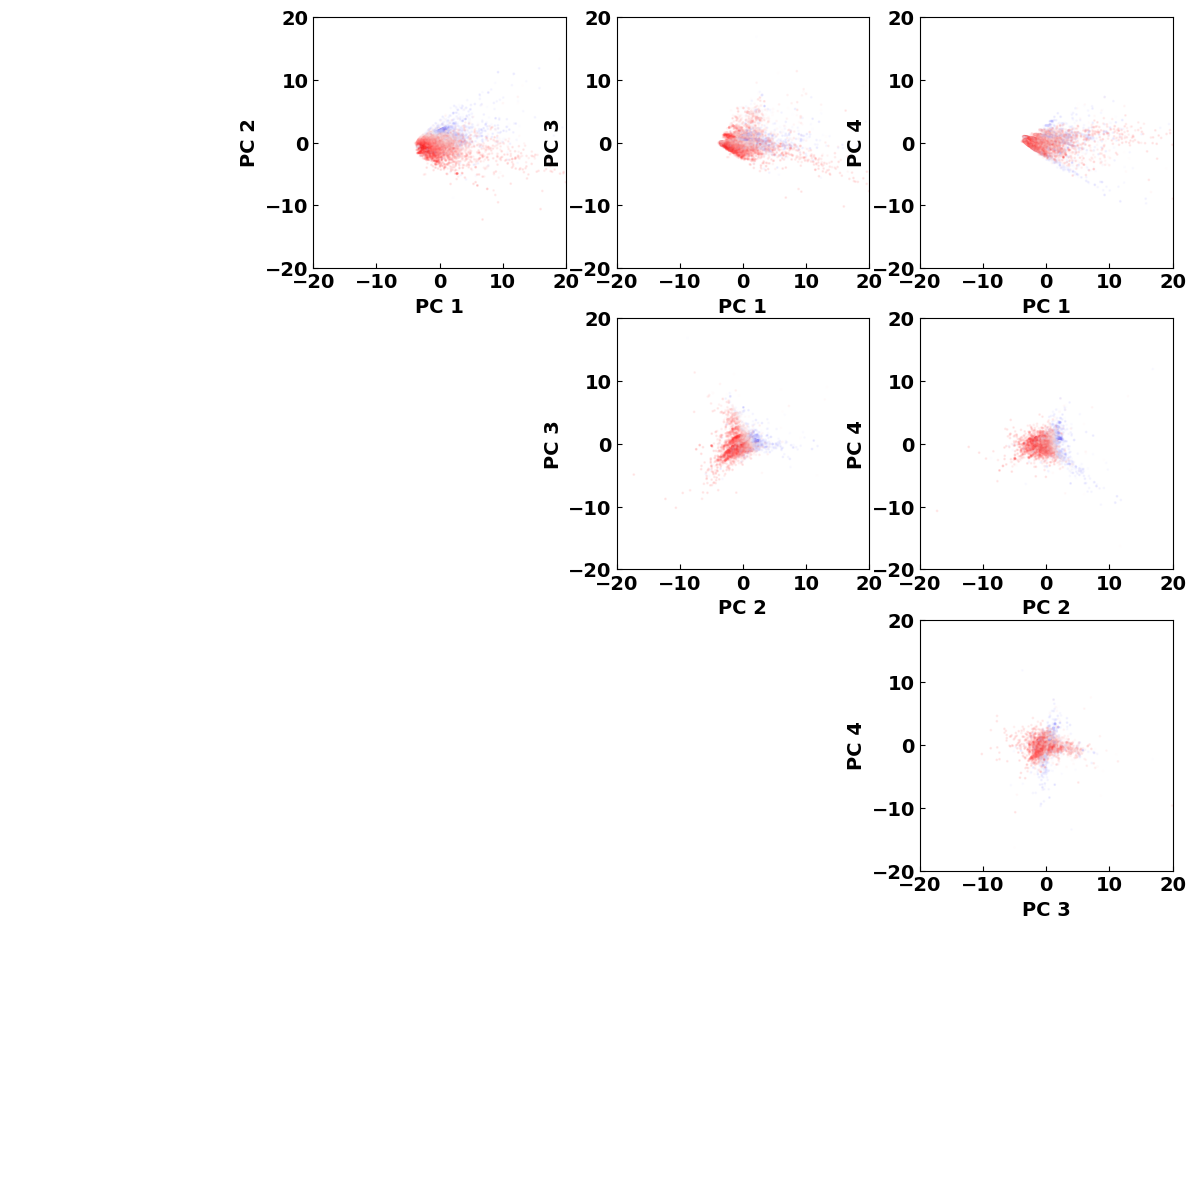

In [43]:
# global specifications on plots
plt.rcParams.update({'font.size': 14,
                     'font.weight' : 'bold',
                     'axes.labelweight': 'bold',
                     'lines.markersize' : 1})

cmap  = plt.colormaps['bwr']
fig, axes = plt.subplots(ncomp, ncomp, figsize=(15, 15))


# Generate a random permutation of indices
n_samples = X_transform.shape[0]  # Number of elements in each column
random_indices = np.random.permutation(n_samples) # random indices

for i in range(ncomp):
    for j in range(ncomp):
        if i != j and i<j:
            # Plot only unique combinations (i, j) where i ≠ j
            ax = axes[i, j]
            ax.scatter(X_transform[random_indices, i], \
                       X_transform[random_indices, j], \
                       c=ysc[random_indices],cmap=cmap,alpha=0.1,edgecolor=None)
            ax.set_xlabel(f"PC {i + 1}")
            ax.set_ylabel(f"PC {j + 1}")
            ax.set_xlim([-20,20])
            ax.set_ylim([-20,20])
            ax.tick_params(direction='in')
        else:
            # Hide the diagonal subplots where i == j
            axes[i, j].axis("off")




### Determining the Optimal Number of Clusters

In clustering analysis, choosing the right number of clusters, \( k \), is crucial for achieving meaningful grouping of data. Two common metrics to guide this choice are the **Within-cluster Sum of Squares (WSS)** and the **Silhouette Score**:

- **WSS** measures the compactness of clusters by calculating the sum of squared distances between each data point and its assigned cluster center. A sharp decrease in WSS as \( k \) increases typically indicates better cluster fit, with diminishing returns suggesting an "elbow" point — a candidate for the optimal \( k \).

- **Silhouette Score** assesses both the cohesion (how close points are within the same cluster) and separation (how distinct clusters are from each other). Higher silhouette scores indicate better-defined clusters, with scores close to 1 implying that clusters are compact and well-separated.

The code below calculates WSS and silhouette scores for cluster counts ranging from 1 to a specified maximum. By plotting both metrics, we can visually evaluate which \( k \) value provides the best balance between compact and distinct clusters, aiding in the selection of an optimal number of clusters.


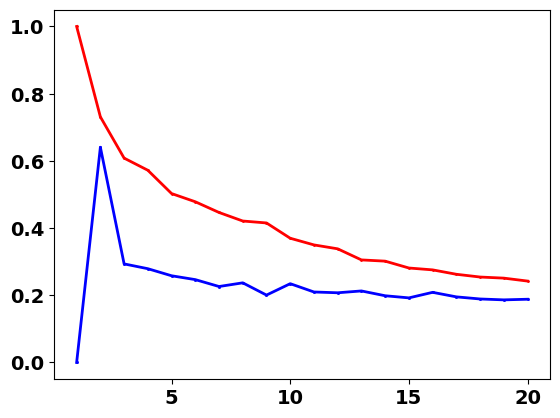

In [46]:
# This function calculates and returns two clustering metrics:
# 1. WSS (Within-cluster Sum of Squares) and
# 2. Silhouette Score
# for values of k (number of clusters) ranging from 1 to kmax.

def calculate_WSS_sil(points, kmax):
    sse = []         # List to store the Within-cluster Sum of Squares (WSS) for each k
    sil = [0.]       # List to store silhouette scores; starts with 0 for k=1 as silhouette is undefined for k=1

    # Loop over the range of cluster numbers (k values) from 1 up to the specified maximum (kmax)
    for k in range(1, kmax + 1):
        # Initialize KMeans with the current number of clusters, k, and fit it to the data
        kmeans = KMeans(n_clusters=k).fit(points)
        labels = kmeans.labels_            # Cluster labels for each point
        centroids = kmeans.cluster_centers_ # Coordinates of the cluster centroids
        pred_clusters = kmeans.predict(points) # Predict cluster for each data point

        # Initialize the current sum of squared errors (SSE) to 0 for this k
        curr_sse = 0

        # Calculate the WSS for the current k by summing the squared distances
        # between each point and its assigned cluster center
        for i in range(len(points)):
            curr_center = centroids[pred_clusters[i]]  # Cluster center for the i-th point
            dr = points[i, :] - curr_center[:]         # Difference vector between point and its center
            curr_sse += np.dot(dr, dr)                 # Add the squared distance to the current SSE

        # Silhouette score is only defined for k > 1, so add it only when k > 1
        if k > 1:
            sil.append(silhouette_score(points, labels, metric='euclidean'))  # Calculate silhouette score

        # Append the computed WSS (curr_sse) for the current k
        sse.append(curr_sse)

    # Return the list of WSS and silhouette scores for each k from 1 to kmax
    return sse, sil


# Set the maximum number of clusters to consider
kmax = 20

# Call the function to calculate WSS and silhouette scores for k values from 1 to kmax
(sse, sil) = calculate_WSS_sil(Xsc, kmax)

# Plotting the results
plt.plot(range(1, kmax + 1), sse / np.max(sse), 'o-r', linewidth=2)  # Plot normalized WSS for each k
plt.plot(range(1, kmax + 1), sil, 's-b', linewidth=2)                # Plot silhouette scores for each k
plt.show()


### Introduction to $K$-means Clustering

**$K$-means clustering** is a popular unsupervised learning algorithm that groups data into \( $k$ \) clusters based on feature similarity. The algorithm works as follows:

1. **Initialization**: The algorithm begins by selecting \( k \) initial cluster centroids, which can be chosen randomly or by another initialization method.
  
2. **Assignment Step**: Each data point is assigned to the nearest centroid based on the Euclidean distance. This assignment creates \( $k$ \) clusters, each containing the data points closest to their respective centroid.

3. **Update Step**: For each cluster, the centroid is recalculated as the mean of all points assigned to that cluster.

4. **Iteration**: Steps 2 and 3 repeat until convergence, typically when the centroids no longer change significantly, or after a maximum number of iterations.

The goal of $k$-means is to minimize the **Within-cluster Sum of Squares (WSS)**, also called inertia, which represents the compactness of clusters. By minimizing WSS, $k$-means finds a clustering solution where points within each cluster are as close to each other as possible, while clusters are distinct.

In the cells below, we apply $k$-means to a synthetic dataset, evaluating the WSS and **Silhouette Score** for various values of \( $k$ \) to guide our choice of the optimal number of clusters. We then visualize the resulting clusters for different \( $k$ \) values to explore how cluster structures change.


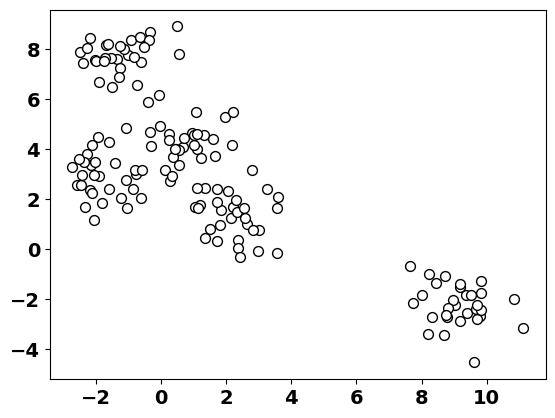

In [47]:
# Import necessary libraries for plotting and generating data
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset using make_blobs, which creates clusters of data points
Xgen, ygen = make_blobs(
   n_samples=150,      # Total number of data points to generate
   n_features=2,       # Number of features (dimensions) for each data point
   centers=5,          # Number of clusters (centers) to generate
   cluster_std=0.8,    # Standard deviation of clusters, controls spread
   shuffle=True,       # Shuffle data to randomize cluster ordering
   random_state=0      # Seed for reproducibility
)

# Plot the generated data points
plt.scatter(
   Xgen[:, 0], Xgen[:, 1],  # X and Y coordinates for data points
   c='white',               # Color of data points
   marker='o',              # Shape of data points (circle)
   edgecolor='black',       # Color of edges around data points
   s=50                     # Size of each data point
)

# Display the plot
plt.show()

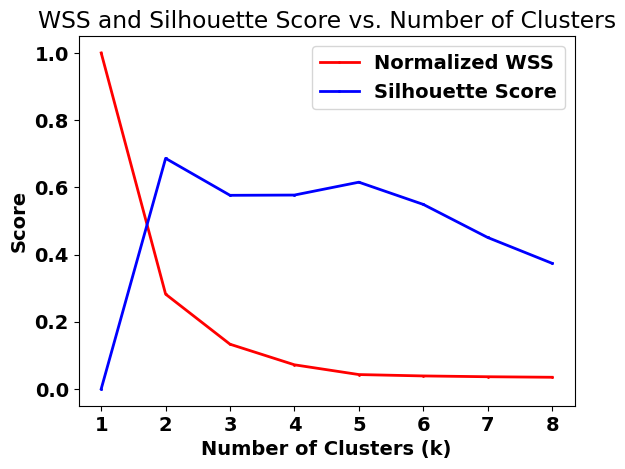

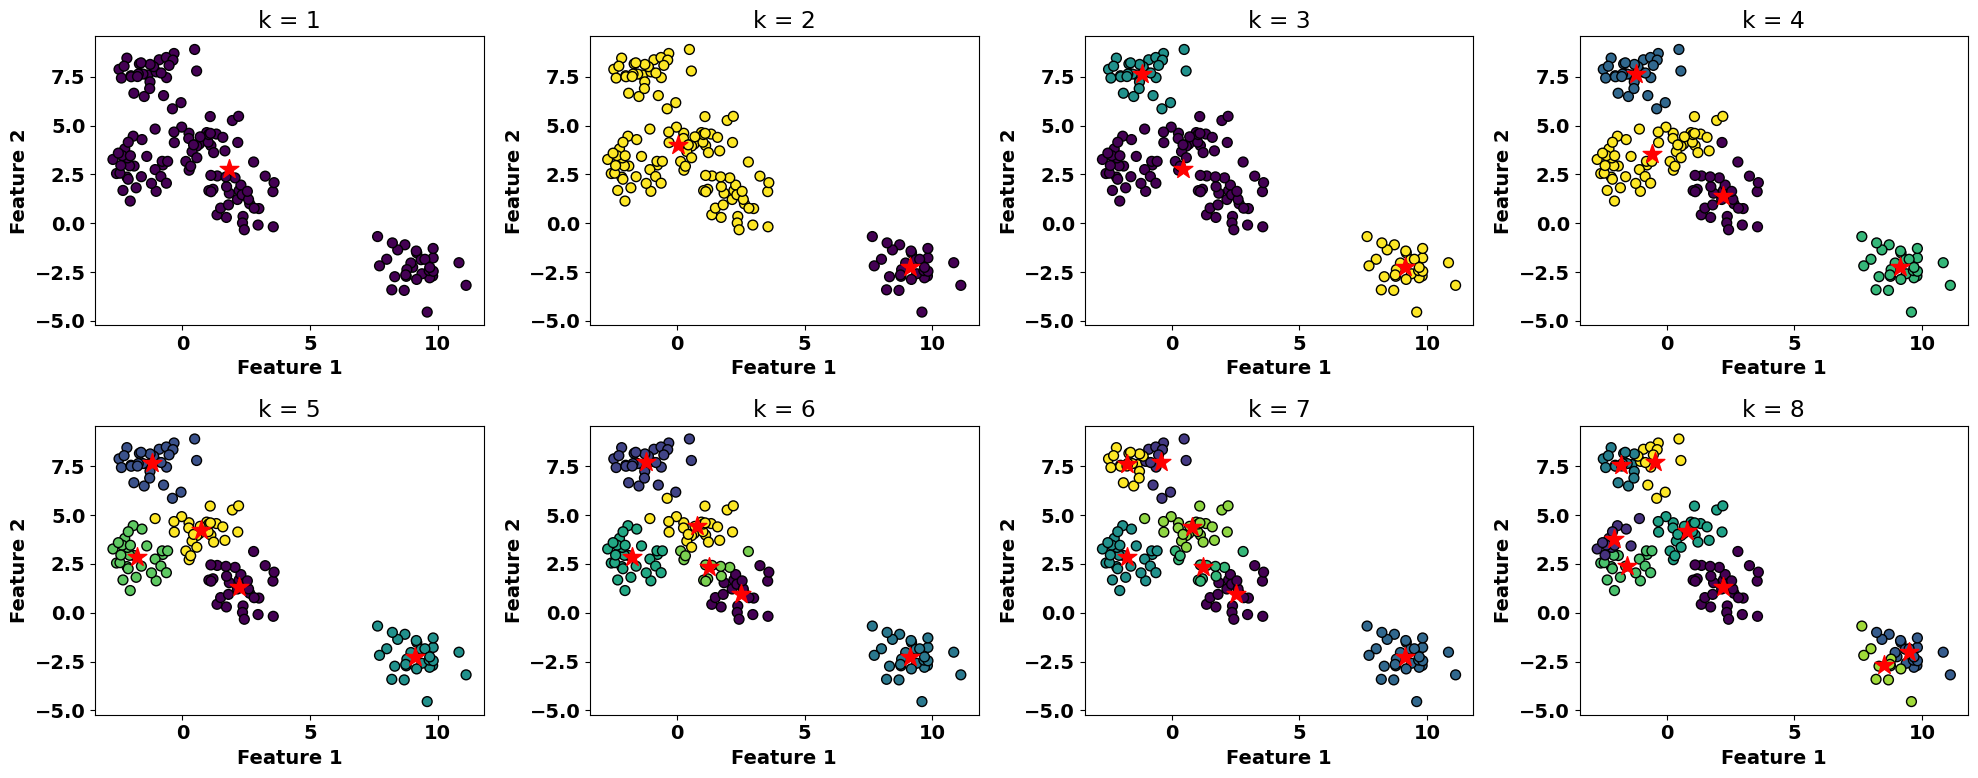

In [48]:
# Define the maximum number of clusters to evaluate
kmax = 8

# Calculate WSS (Within-cluster Sum of Squares) and silhouette scores
# for values of k (number of clusters) from 1 to kmax
sse, sil = calculate_WSS_sil(Xgen, kmax)

# Plot WSS values (normalized) for each k
plt.plot(range(1, kmax + 1), sse / np.max(sse), 'o-r', linewidth=2, label="Normalized WSS")

# Plot silhouette scores for each k
plt.plot(range(1, kmax + 1), sil, 's-b', linewidth=2, label="Silhouette Score")

# Add labels, legend, and title for the plot
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("WSS and Silhouette Score vs. Number of Clusters")
plt.legend()
plt.show()

# Visualize clusters formed for each k in the range 1 to kmax
fig, axes = plt.subplots(2, int(np.ceil(kmax/2)), figsize=(20, 8))
axes = axes.flatten()  # Flatten axes array for easy indexing

for k in range(1, kmax + 1):
    # Fit KMeans with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Xgen)
    labels = kmeans.labels_  # Retrieve labels for each point based on clustering
    centroids = kmeans.cluster_centers_  # Cluster centers for visualization

    # Plot data points, color-coded by cluster label, in each subplot
    scatter = axes[k - 1].scatter(
        Xgen[:, 0], Xgen[:, 1],
        c=labels, cmap='viridis', marker='o', edgecolor='black', s=50
    )
    # Plot cluster centroids as red stars
    axes[k - 1].scatter(
        centroids[:, 0], centroids[:, 1],
        c='red', marker='*', s=200, label='Centroids'
    )

    # Set title and adjust labels for the subplot
    axes[k - 1].set_title(f"k = {k}")
    axes[k - 1].set_xlabel("Feature 1")
    axes[k - 1].set_ylabel("Feature 2")

# Adjust layout to prevent overlapping and display all subplots
plt.tight_layout()
plt.show()
